In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-04-22 21:53:11.833738: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Step 1: Import and review dataset
data = pd.read_csv("dataset.csv")
print(data.head())

       URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0   M0_109          16                          7  iso-8859-1   
1  B0_2314          16                          6       UTF-8   
2   B0_911          16                          6    us-ascii   
3   B0_113          17                          6  ISO-8859-1   
4   B0_403          17                          6       UTF-8   

                  SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
0                  nginx           263.0           NaN            NaN   
1          Apache/2.4.10         15087.0           NaN            NaN   
2  Microsoft-HTTPAPI/2.0           324.0           NaN            NaN   
3                  nginx           162.0            US             AK   
4                    NaN        124140.0            US             TX   

      WHOIS_REGDATE WHOIS_UPDATED_DATE  ...  DIST_REMOTE_TCP_PORT  REMOTE_IPS  \
0  10/10/2015 18:21                NaN  ...                     0           2   
1       

In [3]:
# Step 2: Remove individual and redundant features
features_to_remove = ['URL', 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']
data.drop(features_to_remove, axis=1, inplace=True)

In [4]:
# Step 3: Encode categorical data
data = pd.get_dummies(data, columns=['CHARSET', 'SERVER', 'WHOIS_COUNTRY'])

In [5]:
# Step 4: Handle missing values
data.fillna(data.median(), inplace=True)

In [6]:
# Step 5: Normalize data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[data.columns[:-1]] = scaler.fit_transform(data[data.columns[:-1]])

In [7]:
# Step 6: Split dataset into training and test datasets
from sklearn.model_selection import train_test_split

X = data.drop('Type', axis=1)
y = data['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 7: Define model architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Step 8: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Step 9: Train the model on training dataset
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8125 - loss: 0.6421 - val_accuracy: 0.9018 - val_loss: 0.4869
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8797 - loss: 0.4545 - val_accuracy: 0.9018 - val_loss: 0.3123
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8704 - loss: 0.3428 - val_accuracy: 0.9018 - val_loss: 0.2591
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8724 - loss: 0.3074 - val_accuracy: 0.9263 - val_loss: 0.2358
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9103 - loss: 0.2511 - val_accuracy: 0.9298 - val_loss: 0.2167
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9147 - loss: 0.2309 - val_accuracy: 0.9509 - val_loss: 0.2018
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9387 - loss: 0.2102 - val_accuracy: 0.9544 - val_loss: 0.1893
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9553 - loss: 0.1663 - val_accuracy: 0.9544 - val_loss:

In [11]:
# Step 10: Use model to validate test dataset
y_pred = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [12]:
# Step 11: Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9205 - loss: 0.2374 
Test Loss: 0.2001197785139084, Test Accuracy: 0.9271708726882935


In [13]:
# Step 12: Analyze test dataset using ROC/AUC, confusion matrix, predicting probability for test set, classification report

# ROC/AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred.round())
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred.round())
print('Classification Report:')
print(class_report)


ROC AUC: 0.9135588876073306
Confusion Matrix:
[[303   3]
 [ 23  28]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       306
         1.0       0.90      0.55      0.68        51

    accuracy                           0.93       357
   macro avg       0.92      0.77      0.82       357
weighted avg       0.93      0.93      0.92       357



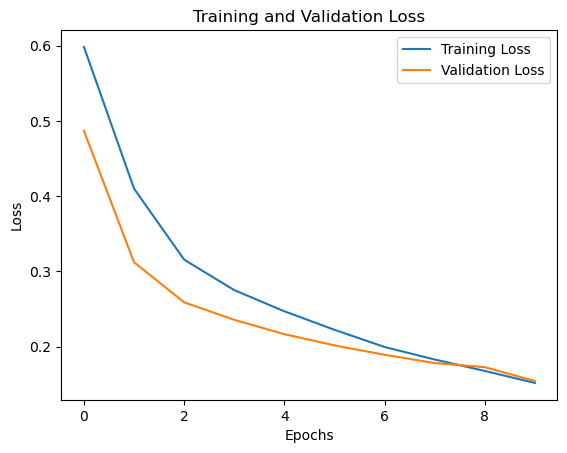

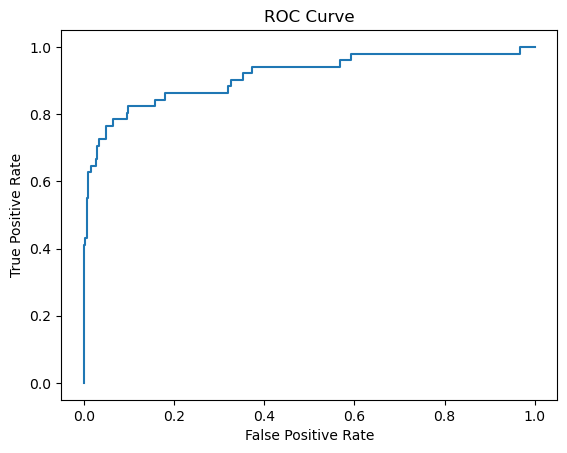

In [14]:
# Step 13: Build plots illustrating analysis
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()